In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from librosa import cqt

os.chdir('..')  # ONLY EXECUTE ONCE PER SESSION!
from music_transcription.onset_detection.read_data import read_X
from music_transcription.onset_detection.cnn_onset_detection import CnnOnsetDetector

Using Theano backend.


In [2]:
wavpath = r'data\recordings\audio\mim-riff1-short-slow.wav'

## Constant Q Transform (CQT)

In [3]:
onset_detector = CnnOnsetDetector.from_zip('models/onset_detection/20170601-3-channels_ds1-4_80-perc_adjusted-labels_with_config.zip')
sg = onset_detector.feature_extractor._read_and_extract([wavpath])
np.array(sg).shape

fr_hz = onset_detector.feature_extractor.frame_rate_hz
sr = onset_detector.feature_extractor.sample_rate
subs = onset_detector.feature_extractor.subsampling_step
samples, _ = read_X(wavpath, fr_hz, sr, subs)
print(samples.shape)
samples = samples.ravel()
print(samples.shape)

(2001, 441)
(882441,)


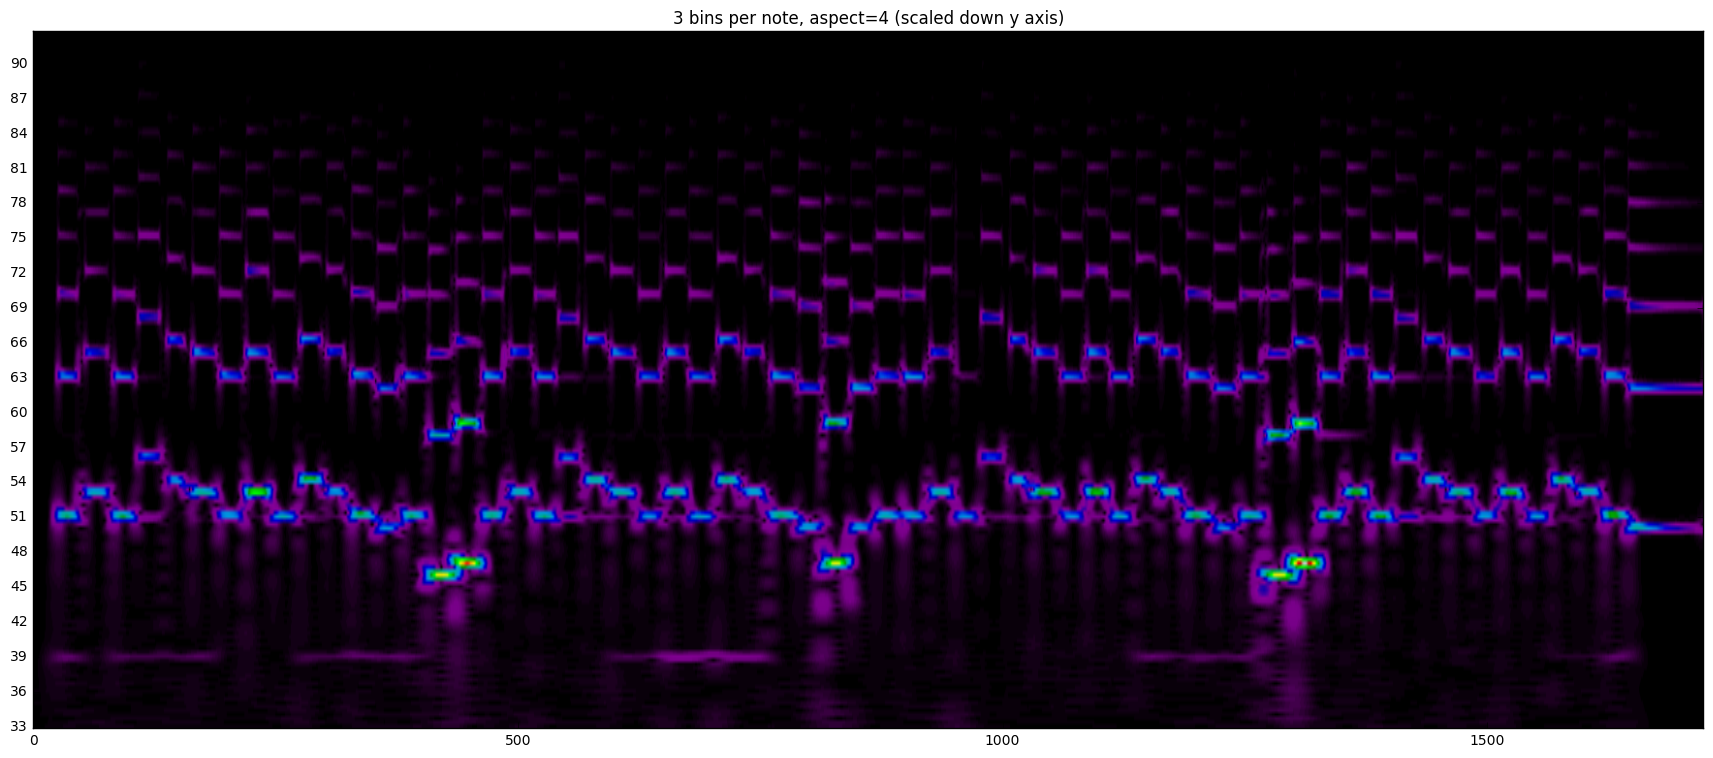

In [5]:
hopl = 512 # must be 2^n cannot be 441 (= subs)
n_bins=60
lowfreq = 55.0 # A1 (midi 33) # gtr E 82.4068892282
# highfreq = lowfreq * 2**(n_bins/12)

cqt_spect = cqt(samples, sr=sr, hop_length=hopl, fmin=lowfreq, n_bins=n_bins*3, bins_per_octave=36, scale=False)
cqt_spect = np.abs(cqt_spect)  # convert from complex to real (uses "norm")

plt.figure(figsize=(24,9))
plt.imshow(cqt_spect, aspect=4, origin='lower', cmap=plt.cm.spectral)
plt.title('3 bins per note, aspect=4 (scaled down y axis)')
yt = np.arange(0, cqt_spect.shape[0], 9)
_ = plt.yticks(yt, (yt/3+33).astype('int')) # range starts at midi pitch 33

In [6]:
cqt_spect.shape

(180, 1724)

In [11]:
p = cqt_spect[:,428]
len(p)

180

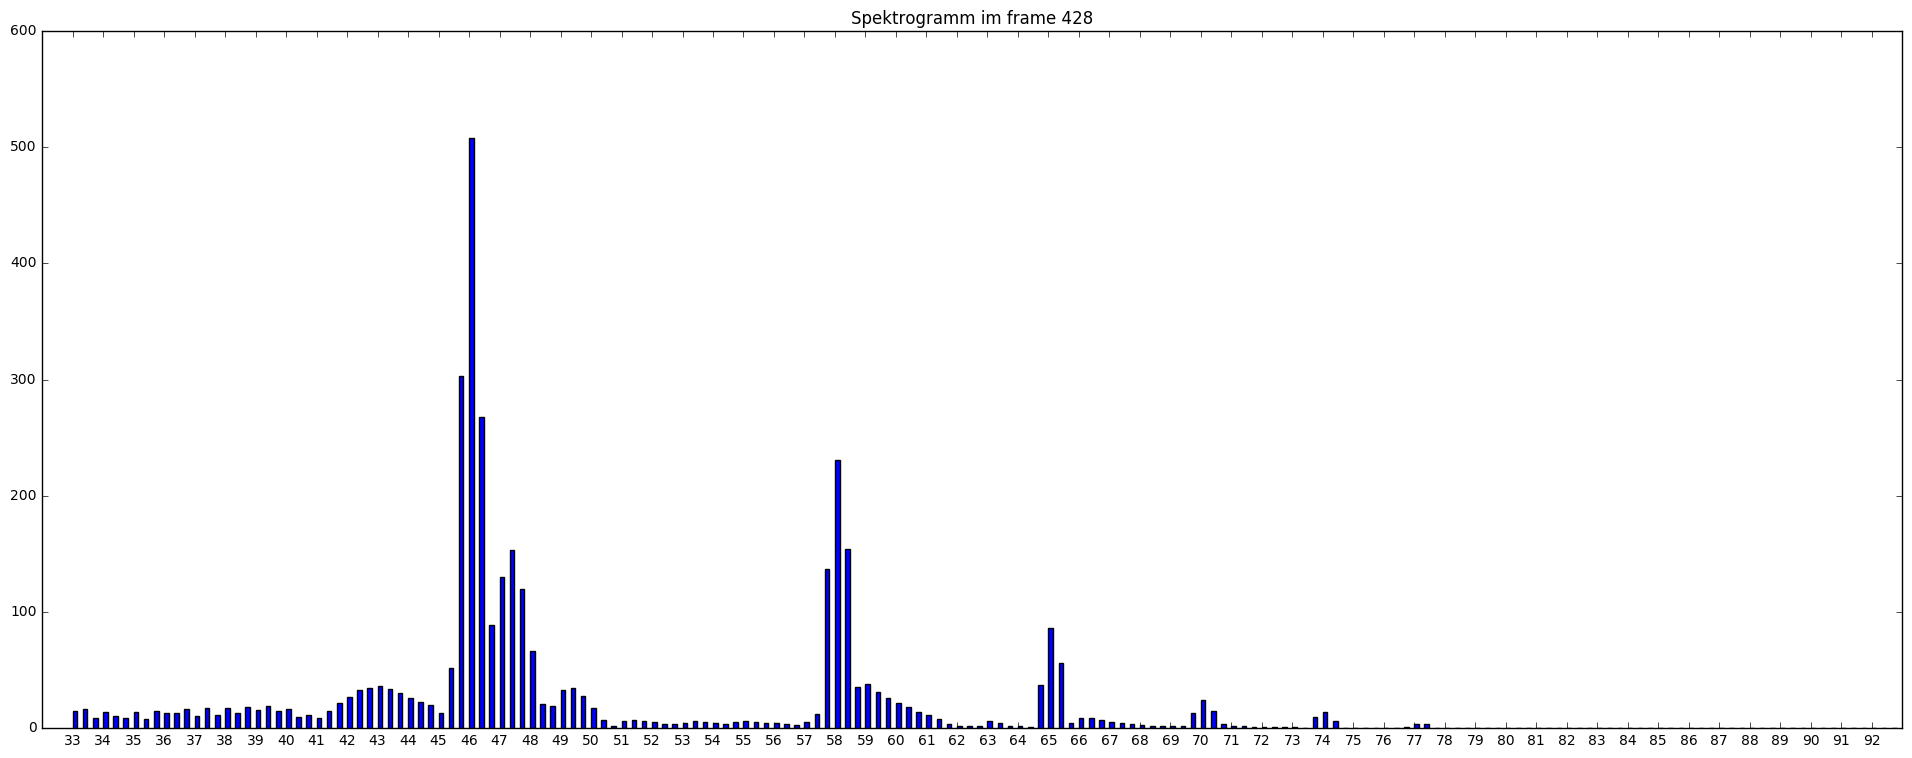

In [29]:
plt.figure(figsize=(24,9))
plt.bar(np.arange(33,93,1/3), p, 0.15)
plt.xticks(np.arange(33,93,1))
plt.axis([32,93,0,600])
_ = plt.title('Spektrogramm im frame 428')

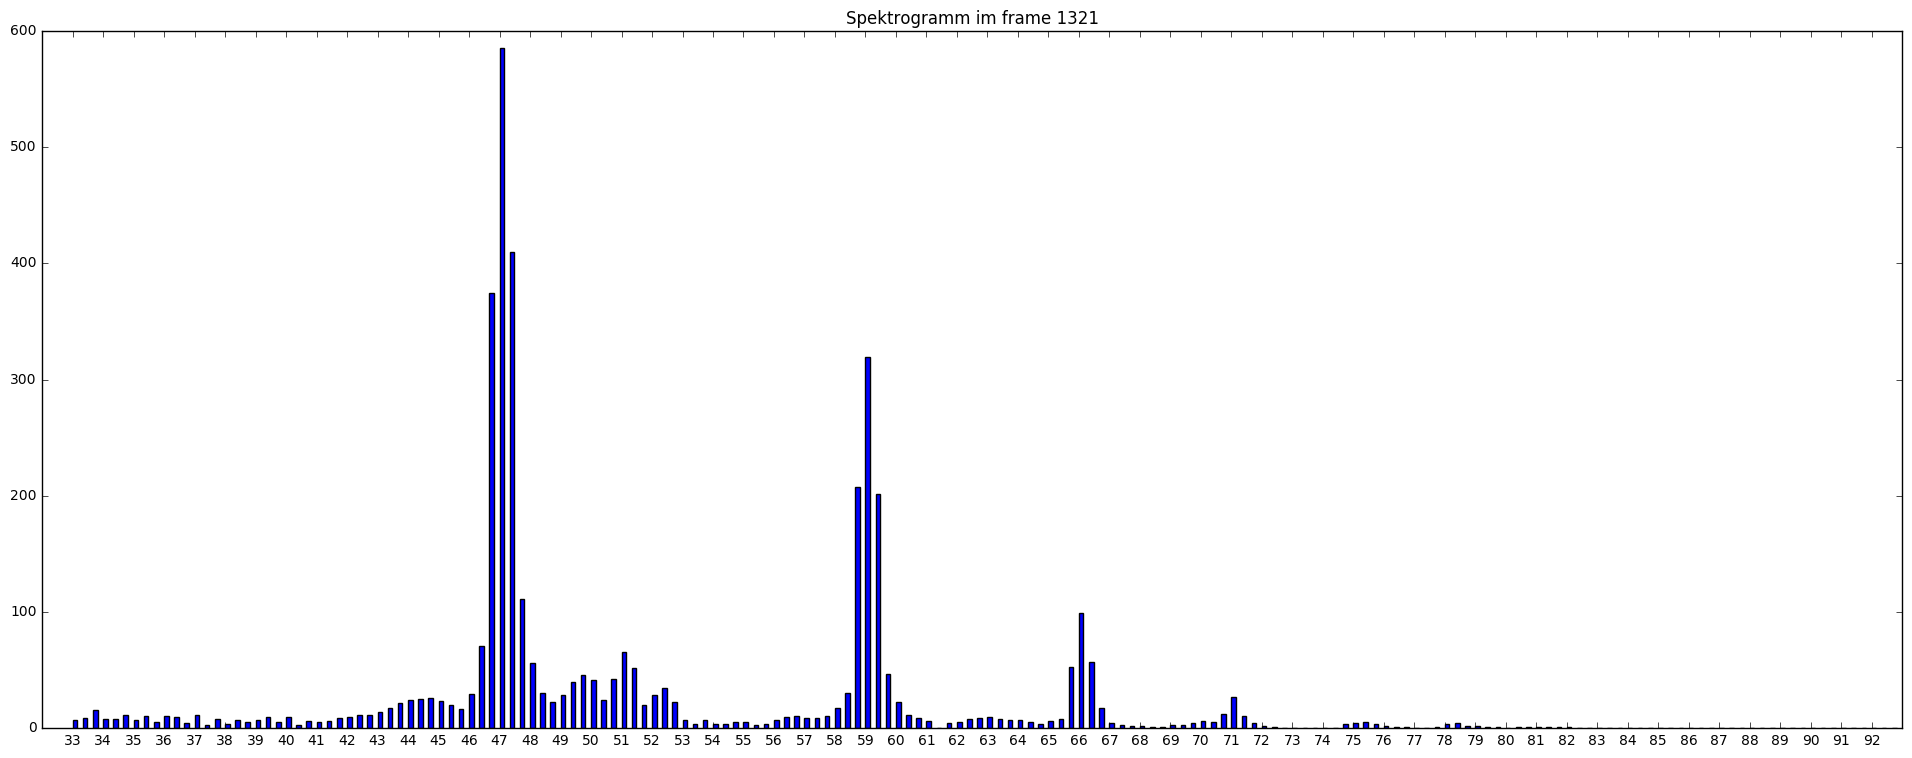

In [34]:
from ipywidgets import interact, IntSlider

paramtools = {
    'bar_i': IntSlider(min=0, max=cqt_spect.shape[1]-1, step=1, value=15),
}

@interact(**paramtools)
def plot_bar_i(bar_i):
    plt.figure(figsize=(24,9))
    plt.bar(np.arange(33,93,1/3), cqt_spect[:,bar_i], 0.15)
    plt.xticks(np.arange(33,93,1))
    plt.axis([32,93,0,600])
    _ = plt.title('Spektrogramm im frame ' + str(bar_i))

In [36]:
cqt_spect.max()

808.14245905261555

In [53]:
(cqt_spect > 600).astype('int').sum()

28